**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Gbegbe Decaho <br/>
Student Number: 300094197

Name: <br/>
Student Number:

In [ ]:
# Code cell

## 1. Analyse exploratoire

### Chargement de l'ensemble de données

Un ensemble de données a été créé pour ce devoir. Il est disponible sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Vous devez accéder à l'ensemble de données et le lire directement à partir de ce dépôt GitHub dans votre notebook Jupyter.

Utilisez cette cellule de code pour vos directives `import` et autres initialisations.

In [20]:
# Code cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score

1. **Charger l'ensemble de données** :

    - Écrivez du code pour charger les trois ensembles de données.


In [8]:
# Code cell

cb513_test_data = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/f82224c0b42e3b433981e628474e4809430cd6de/assignments-data/a3/cb513_test.csv")
cb513_train_data = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/f82224c0b42e3b433981e628474e4809430cd6de/assignments-data/a3/cb513_train.csv")
cb513_validation_data = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/f82224c0b42e3b433981e628474e4809430cd6de/assignments-data/a3/cb513_valid.csv")


### Prétraitement des données

2. **Brasser les lignes** :

    - Étant donné que les exemples sont générés en faisant glisser une fenêtre sur chaque séquence de protéines, la plupart des exemples adjacents proviennent de la même protéine et partagent 20 positions. Pour atténuer l'impact potentiel négatif sur l'entraînement du modèle, la première étape consiste à brasser (*shuffle*) les **lignes** de la matrice de données.


In [9]:
# Code cell
cb513_test_data = shuffle(cb513_test_data)
cb513_train_data = shuffle(cb513_train_data)
cb513_validation_data = shuffle(cb513_validation_data)


3. **Mise à l'échelle des caractéristiques numériques** :

    - Étant donné que les 462 caractéristiques sont des proportions représentées par des valeurs comprises entre 0 et 1, la mise à l'échelle peut ne pas être nécessaire. Dans nos évaluations, l'utilisation de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) a en fait dégradé les performances du modèle. Dans votre flux de traitement, comparez les effets de ne pas mettre à l'échelle les données par rapport à l'application de [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Par souci de temps, une seule expérience suffira. Il est important de noter que lorsque la mise à l'échelle est appliquée, une méthode uniforme doit être utilisée pour toutes les colonnes, compte tenu de leur nature homogène.

In [10]:
# Code cell
# Option 1: Sans mise à l'échelle
X_validation_no_scaling = cb513_validation_data.iloc[:, 1:]
y_validation = cb513_validation_data.iloc[:, 0]

# Option 2: Avec mise à l'échelle (MinMaxScaler)
scaler = MinMaxScaler()
X_validation_scaled = scaler.fit_transform(cb513_validation_data.iloc[:, 1:])


4. **Séparation des cibles et des données** :

    - Dans les fichiers CSV, les cibles et les données sont combinées. Pour préparer nos expériences d'apprentissage automatique, séparez les données d'entraînement $X$ et le vecteur cible $y$ pour chacun des trois ensembles de données.

In [11]:
# Code cell
X_test = cb513_test_data.iloc[:, 1:]
y_test = cb513_test_data.iloc[:, 0]

X_train = cb513_train_data.iloc[:, 1:]
y_train = cb513_train_data.iloc[:, 0]

X_val = cb513_validation_data.iloc[:, 1:]
y_val = cb513_validation_data.iloc[:, 0]



### Développement et évaluation des modèles

5. **Développement de modèle** :

    - **Modèle de base** : Implémentez un modèle utilisant le [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Ce modèle ignore les données d'entrée et prédit la classe majoritaire. Un tel modèle est parfois appelé modèle « homme de paille ».

    - **Modèle de référence** : Comme modèle de référence, sélectionnez un des algorithmes d'apprentissage automatique précédemment étudiés : arbres de décision, k-plus proches voisins (KNN) ou régression logistique. Utilisez les paramètres par défaut fournis par scikit-learn pour entraîner chaque modèle en tant que modèle de référence. Pourquoi avez-vous choisi ce classificateur particulier ? Pourquoi pensez-vous qu'il soit approprié pour cette tâche spécifique ?

    - **Modèle de réseau de neurones** : En utilisant [Keras](https://keras.io) et [TensorFlow](https://www.tensorflow.org), construisez un modèle séquentiel comprenant une couche d'entrée, une couche cachée et une couche de sortie. La couche d'entrée doit comporter 462 nœuds, correspondant aux 462 attributs de chaque exemple. La couche cachée doit comprendre 8 nœuds et utiliser la fonction d'activation par défaut. La couche de sortie doit comporter trois nœuds, correspondant aux trois classes : hélice (0), feuillet (1) et enroulement (2). Appliquez la fonction d'activation softmax à la couche de sortie pour que les sorties soient traitées comme des probabilités, avec leur somme égale à 1 pour chaque exemple d'entraînement.

    Nous avons donc trois modèles : de base, de référence et réseau de neurones.

In [12]:
# code cell
# Convert to NumPy arrays to avoid issues with feature names
X_train_np = X_train.values
X_val_np = X_val.values

In [13]:
# Code cell

# Modèle de base
# DummyClassifier comme modèle de base
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_np, y_train)
y_pred_dummy = dummy_clf.predict(X_val_np)
accuracy_dummy = accuracy_score(y_val, y_pred_dummy)
print(f"Baseline Dummy Classifier Accuracy: {accuracy_dummy:.4f}")

# Modèle de référence
# Sélection d'un modèle de référence (Logistic Regression)
logistic_clf = LogisticRegression(max_iter=1000)
logistic_clf.fit(X_train_np, y_train)
y_pred_logistic = logistic_clf.predict(X_val_np)
accuracy_logistic = accuracy_score(y_val, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")

# Modèle de réseau de neurones
# Construction d'un modèle séquentiel simple
model = models.Sequential([
    layers.Input(shape=(X_train_np.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(3, activation="softmax")  # Assuming 3 classes
])

# Compile and train the neural network model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_np, y_train, epochs=10, validation_data=(X_val_np, y_val))

# Evaluate the neural network model on the validation data
val_loss, val_accuracy = model.evaluate(X_val_np, y_val)
print(f"Neural Network Validation Accuracy: {val_accuracy:.4f}")


Baseline Dummy Classifier Accuracy: 0.4198
Logistic Regression Accuracy: 0.6718
Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5983 - loss: 0.8834 - val_accuracy: 0.6736 - val_loss: 0.7711
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6912 - loss: 0.7389 - val_accuracy: 0.6767 - val_loss: 0.7551
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6969 - loss: 0.7236 - val_accuracy: 0.6806 - val_loss: 0.7506
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6969 - loss: 0.7170 - val_accuracy: 0.6852 - val_loss: 0.7482
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7050 - loss: 0.7019 - val_accuracy: 0.6859 - val_loss: 0.7404
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7045 - loss: 0.7001 - val_accuracy: 0.6853 - val_loss: 0.7407
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7078 - loss: 0.6994 - val_accuracy: 0.6852 - val_loss: 0.7440
Epoch 8/10

 Nous avons choisis la méthode de référence car la régression logistique est un modèle simple et interprétable qui permet d'identifier l'importance des caractéristiques pour la classification.
 Elle est adaptée aux tâches de classification binaire et multiclasses, offrant robustesse et rapidité en évitant le surapprentissage sur des petits ensembles de données, contrairement aux arbres de décision.
 Bien adaptée aux données de haute dimension, elle surmonte mieux la "malédiction de la dimensionnalité" que le KNN.
 Pour notre tâche de classification multiclasses, elle modélise efficacement les probabilités par classe et constitue une référence utile avant d’explorer des modèles plus complexes, comme les réseaux de neurones.

6. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer les performances du modèle de référence. Sélectionnez un petit nombre de plis (*plis*) pour éviter des temps de calcul excessives.

    - **L'entraînement des réseaux de neurones peut être long.** Par conséquent, leurs performances sont généralement évaluées une seule fois en utilisant un ensemble de validation. Assurez-vous de ne pas utiliser l'ensemble de test avant la fin du devoir.

    - Évaluez les modèles en utilisant des métriques telles que la précision, le rappel et le score F1.

In [14]:
# Code cell
# Validation croisée sur le modèle de référence (logistic regression)
logistic_clf = LogisticRegression()  # Remplacez par votre modèle de référence
cross_val_scores = cross_val_score(logistic_clf, X_train, y_train, cv=3)

# Affichage des résultats de la validation croisée
print("Validation croisée - Modèle de référence")
print("Scores de validation croisée : ", cross_val_scores)
print("Précision moyenne (cross-val) : ", cross_val_scores.mean())

# Évaluation du réseau de neurones sur l'ensemble de validation
y_pred_nn = np.argmax(model.predict(X_val), axis=1)
accuracy_nn = accuracy_score(y_val, y_pred_nn)
recall_nn = recall_score(y_val, y_pred_nn, average='weighted')
f1_nn = f1_score(y_val, y_pred_nn, average='weighted')

# Affichage des métriques pour le réseau de neurones
print("\nÉvaluation - Réseau de neurones")
print("Précision : ", accuracy_nn)
print("Rappel : ", recall_nn)
print("Score F1 : ", f1_nn)


Validation croisée - Modèle de référence
Scores de validation croisée :  [0.68296449 0.69032424 0.68219249]
Précision moyenne (cross-val) :  0.6851604048721908
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Évaluation - Réseau de neurones
Précision :  0.6910097192224622
Rappel :  0.6910097192224622
Score F1 :  0.6864887751187514


### Optimisation des hyperparamètres

7. **Modèle de référence :**

    - Pour assurer une comparaison équitable avec notre modèle de référence, nous examinerons comment la variation des hyperparamètres affecte ses performances. Cela évite la conclusion erronée selon laquelle les réseaux de neurones sont intrinsèquement meilleurs, alors qu'en réalité, un ajustement adéquat des hyperparamètres pourrait améliorer les performances du modèle de référence.

    - Concentrez-vous sur les hyperparamètres suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

    - Utilisez une stratégie de recherche par grille ou les méthodes intégrées de scikit-learn [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) pour évaluer de manière exhaustive toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

    - Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

    - Analysez les résultats et fournissez des aperçus sur quelles configurations d'hyperparamètres ont obtenu des performances optimales pour chaque modèle.

In [15]:
# Recherche d'hyperparamètres pour DecisionTreeClassifier
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring="accuracy")
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Meilleurs paramètres - DecisionTreeClassifier:", best_params_dt)
print("Meilleure précision (cross-val) - DecisionTreeClassifier:", best_score_dt)

# Recherche d'hyperparamètres pour LogisticRegression
param_grid_lr = {'penalty': ['l2'], 'max_iter': [100, 200, 300], 'tol': [1e-3, 1e-4, 1e-5]}
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=3, scoring="accuracy")
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Meilleurs paramètres - LogisticRegression:", best_params_lr)
print("Meilleure précision (cross-val) - LogisticRegression:", best_score_lr)

# Recherche d'hyperparamètres pour KNeighborsClassifier
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring="accuracy")
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Meilleurs paramètres - KNeighborsClassifier:", best_params_knn)
print("Meilleure précision (cross-val) - KNeighborsClassifier:", best_score_knn)

# Évaluation des meilleurs modèles sur les métriques de précision, rappel et F1
# Convert data to NumPy arrays to avoid feature name mismatch
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()

# Refit and evaluate each model on the validation set
models = {
    'DecisionTreeClassifier': grid_search_dt.best_estimator_,
    'LogisticRegression': grid_search_lr.best_estimator_,
    'KNeighborsClassifier': grid_search_knn.best_estimator_
}

for model_name, model in models.items():
    # Re-train the model on the NumPy array version of X_train
    model.fit(X_train_np, y_train)

    # Make predictions on the NumPy array version of X_val
    y_pred = model.predict(X_val_np)

    # Calculate metrics for the validation set
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Print evaluation results
    print(f"\n{model_name} - Évaluation sur l'ensemble de validation")
    print("Précision:", accuracy)
    print("Rappel:", recall)
    print("Score F1:", f1)

Meilleurs paramètres - DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 10}
Meilleure précision (cross-val) - DecisionTreeClassifier: 0.5565105506948019
Meilleurs paramètres - LogisticRegression: {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
Meilleure précision (cross-val) - LogisticRegression: 0.6851260936695832
Meilleurs paramètres - KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'distance'}
Meilleure précision (cross-val) - KNeighborsClassifier: 0.48464573683307594

DecisionTreeClassifier - Évaluation sur l'ensemble de validation
Précision: 0.5460313174946004
Rappel: 0.5460313174946004
Score F1: 0.5364827175572463

LogisticRegression - Évaluation sur l'ensemble de validation
Précision: 0.6708963282937365
Rappel: 0.6708963282937365
Score F1: 0.6630846906131505

KNeighborsClassifier - Évaluation sur l'ensemble de validation
Précision: 0.4593682505399568
Rappel: 0.4593682505399568
Score F1: 0.43289683310867333


8. **Réseau de neurones :**

    Lors de notre exploration et ajustement des réseaux de neurones, nous nous concentrons sur les hyperparamètres suivants :

    - **Une seule couche cachée, en variant le nombre de nœuds**.

        - Commencez avec un seul nœud dans la couche cachée. Utilisez un graphique pour représenter l'évolution de la perte et de la précision pour les ensembles d'entraînement et de validation, avec l'axe horizontal représentant le nombre d'époques d'entraînement et l'axe vertical représentant la perte et la précision. L'entraînement de ce réseau devrait être relativement rapide, nous allons donc procéder à un entraînement sur 50 époques. Que concluez-vous de l'observation du graphique ? Le réseau sous-apprend-il ou surapprend-il ? Pourquoi ?

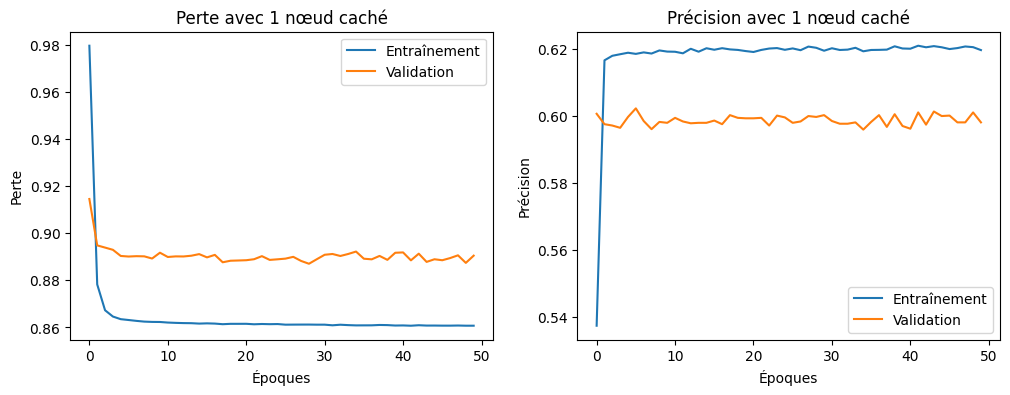

In [21]:
# Code cell
# Define the model
model = Sequential([
    layers.Input(shape=(462,)),
    layers.Dense(1, activation="relu"),
    layers.Dense(3, activation="softmax")
])

# Compilation and training
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

# Visualization of loss and accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Perte avec 1 nœud caché")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Précision avec 1 nœud caché")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()

plt.show()

- **Sous-apprentissage** : Le modèle sous-apprend, avec une précision de validation faible (environ 60 %), car un seul nœud ne capture pas la complexité des données.
  
- **Stabilité** : La perte de validation se stabilise, indiquant l'absence de surapprentissage, mais la précision reste faible, montrant que le modèle est trop simple.

- **Faible performance** : Le modèle plafonne rapidement, et la faible différence entre précision d'entraînement et de validation confirme un sous-ajustement, pas un surapprentissage.

- **Conclusion** : Le modèle sous-apprend car un seul nœud caché est insuffisant pour extraire des caractéristiques complexes nécessaires à une meilleure classification.

        - Répétez le processus ci-dessus en utilisant 2 et 4 nœuds dans la couche cachée. Utilisez le même type de graphique pour documenter vos observations concernant la perte et la précision.

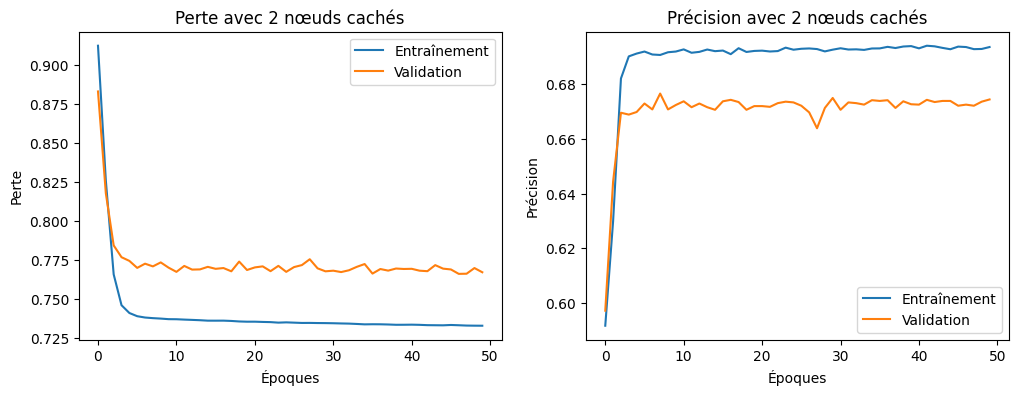

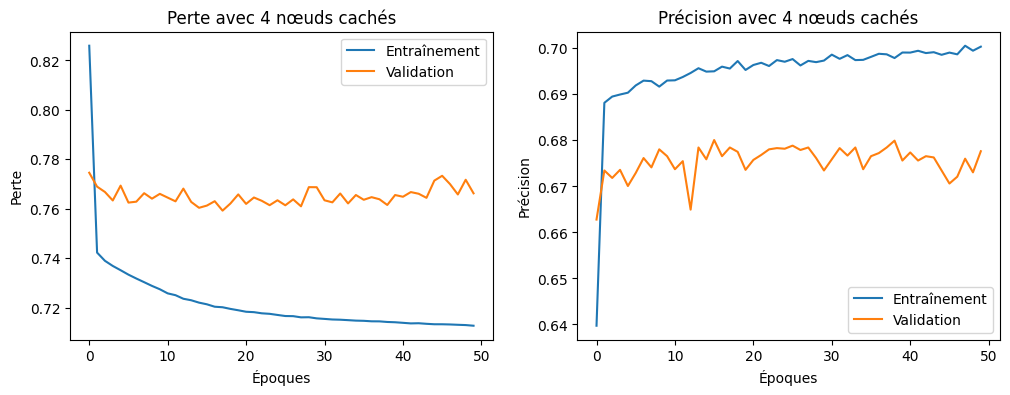

In [22]:
# Code cell

# Fonction pour entraîner et afficher les résultats pour un nombre de nœuds donné
def train_and_plot(nodes):
    # Définir le modèle
    model = models.Sequential([
        layers.Input(shape=(462,)),
        layers.Dense(nodes, activation="relu"),
        layers.Dense(3, activation="softmax")
    ])

    # Compiler et entraîner le modèle
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Afficher les graphiques de perte et de précision
    plt.figure(figsize=(12, 4))

    # Graphique de la perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte avec {nodes} nœuds cachés")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    # Graphique de la précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision avec {nodes} nœuds cachés")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()

# Entraîner et afficher les résultats pour 2 nœuds
train_and_plot(2)

# Entraîner et afficher les résultats pour 4 nœuds
train_and_plot(4)


**Modèle avec 2 nœuds** : La perte de validation diminue au début puis se stabilise, indiquant une capacité d'apprentissage limitée sans surapprentissage notable. La précision de validation atteint rapidement un plateau autour de 68 %, montrant les limites de performance du modèle.

**Modèle avec 4 nœuds** : La perte de validation reste stable après les premières époques, avec peu de surapprentissage et un léger gain par rapport aux 2 nœuds. La précision de validation est légèrement meilleure, atteignant environ 70 %, mais reste stable sans amélioration significative.

**Conclusion** : L'ajout de nœuds de 2 à 4 améliore légèrement la précision de validation. Cependant, le modèle reste limité.

        - Commencez avec 8 nœuds dans la couche cachée et doublez progressivement le nombre de nœuds jusqu'à ce qu'il dépasse le nombre de nœuds dans la couche d'entrée. Cela donne lieu à sept expériences et graphiques correspondants pour les configurations suivantes : 8, 16, 32, 64, 128, 256 et 512 nœuds. Documentez vos observations tout au long du processus.

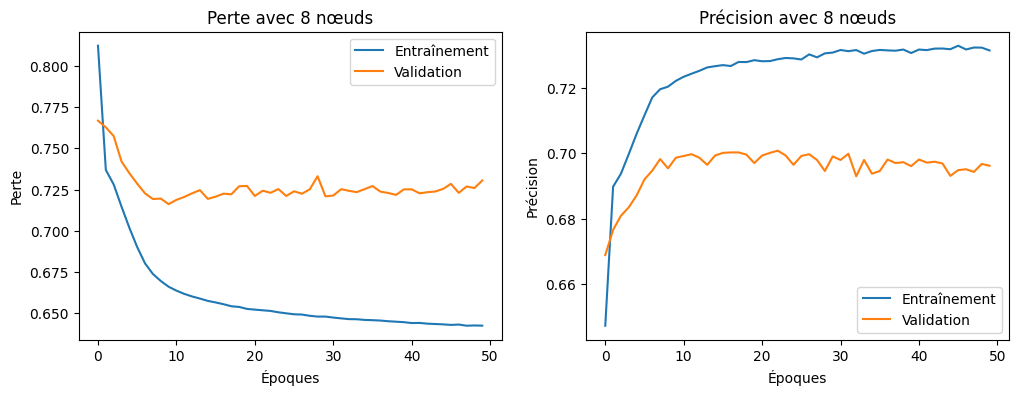

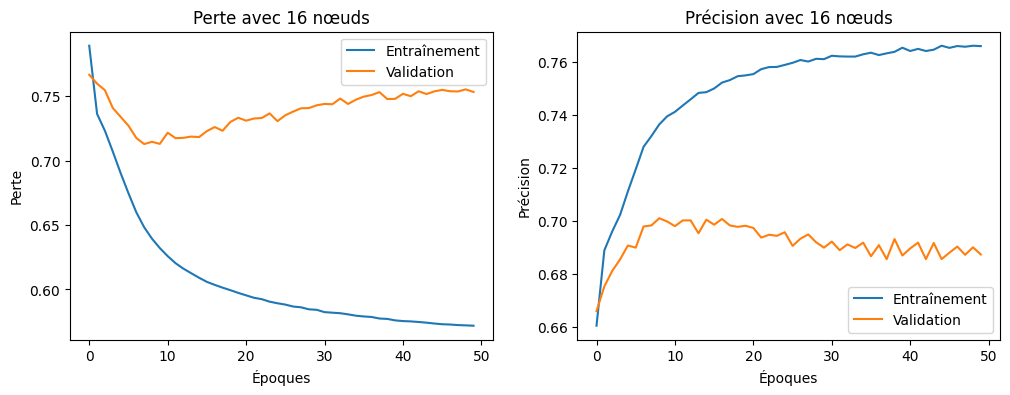

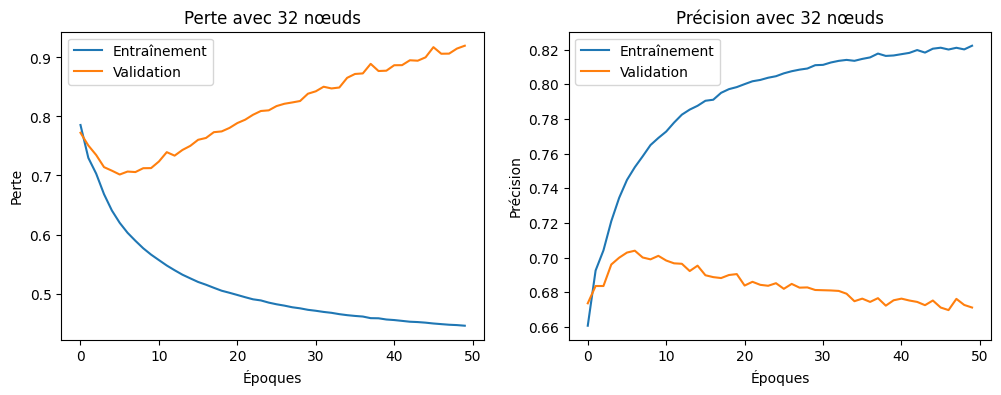

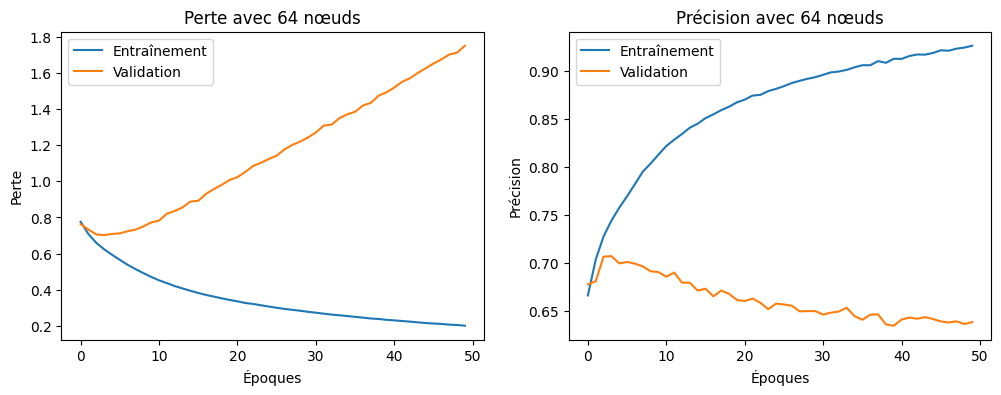

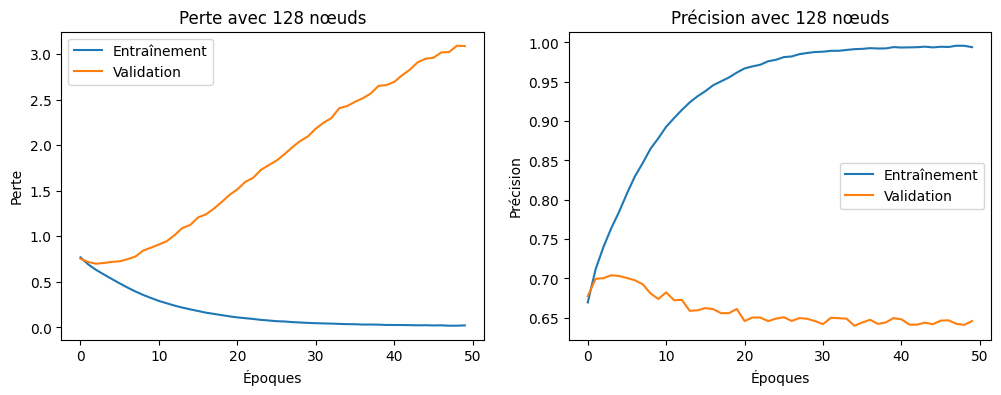

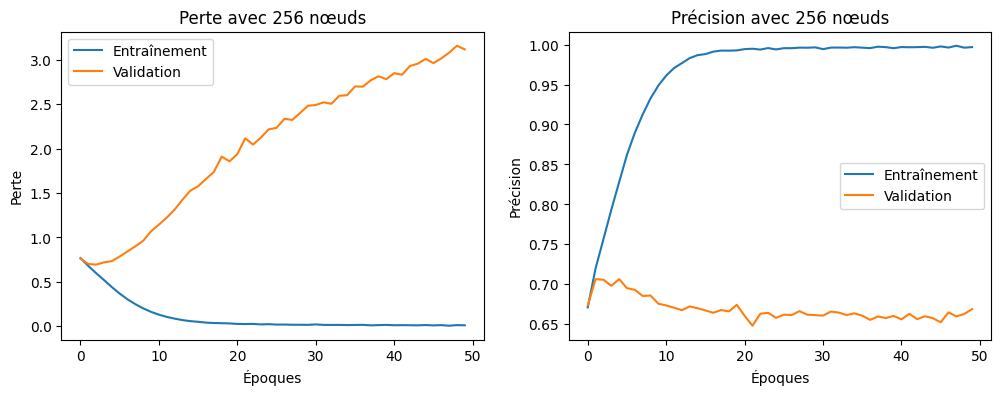

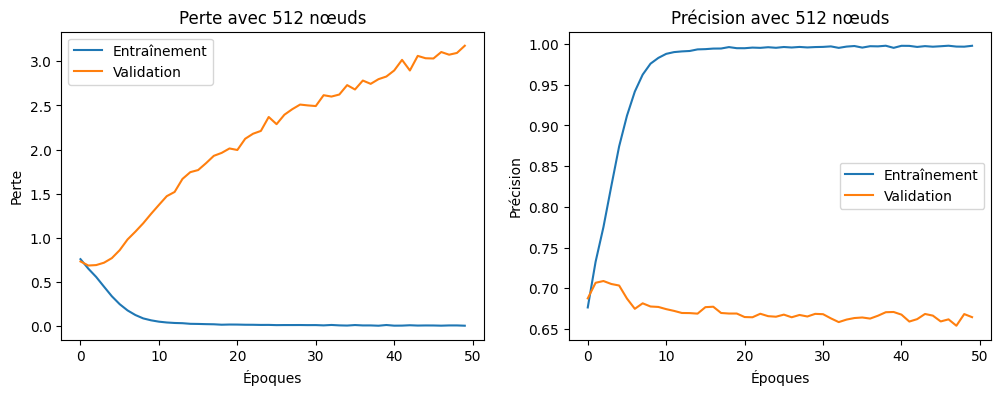

In [29]:
# Code cell
for nodes in [8, 16, 32, 64, 128, 256, 512]:
    model = models.Sequential([
        layers.Input(shape=(462,)),
        layers.Dense(nodes, activation="relu"),
        layers.Dense(3, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Visualiser pour chaque nombre de nœuds
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte avec {nodes} nœuds")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision avec {nodes} nœuds")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()


**32 nœuds :**  
- Perte de validation: Augmente autour de 10 époques, indiquant un début de surapprentissage.  
- Précision de validation: Atteint environ 68 % puis diminue légèrement, signalant une généralisation limitée.  

**64 nœuds :**  
- Perte de validation: Augmente continuellement après les premières époques, montrant un surapprentissage important.  
- *Précision de validation*: Stagne autour de 65 %, indiquant un manque de généralisation malgré une précision d’entraînement élevée.  

**128 nœuds :**  
- Perte de validation: Croît rapidement au-delà de 10 époques, indiquant un surapprentissage sévère.  
- Précision de validation: Se stabilise à 65 % avec une précision d'entraînement proche de 100 %, montrant une forte mémorisation.  

**256 nœuds :**  
- Perte de validation: Augmente fortement, atteignant des niveaux élevés, indiquant un surapprentissage extrême.  
- Précision de validation: Reste autour de 65 % malgré une précision d'entraînement élevée, confirmant une faible généralisation.  

**512 nœuds :**  
- Perte de validation: Monte en flèche, avec un surapprentissage marqué.  
- Précision de validation: Stagne à 65 %, indiquant une généralisation très faible et une mémorisation excessive.  

**Conclusion** :  
Au-delà de 32 nœuds, le modèle surapprend, et la précision de validation reste autour de 65-70 %, montrant qu’une architecture plus simple ou des techniques de régularisation sont nécessaires pour améliorer la généralisation.

        - Assurez-vous que le **nombre d'époques d'entraînement** est suffisant pour **observer une augmentation de la perte de validation**. **Conseil** : Lors du développement du modèle, commencez avec un petit nombre d'époques, comme 5 ou 10. Une fois que le modèle semble bien fonctionner, testez avec des valeurs plus importantes, comme 40 ou 80 époques, ce qui s'est avéré raisonnable dans nos tests. En fonction de vos observations, envisagez de mener des expériences supplémentaires, si nécessaire. Combien d'époques ont finalement été nécessaires ?

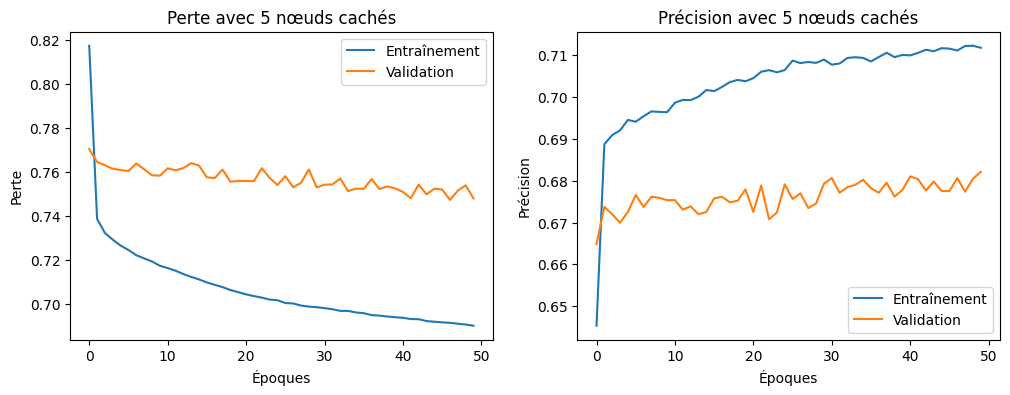

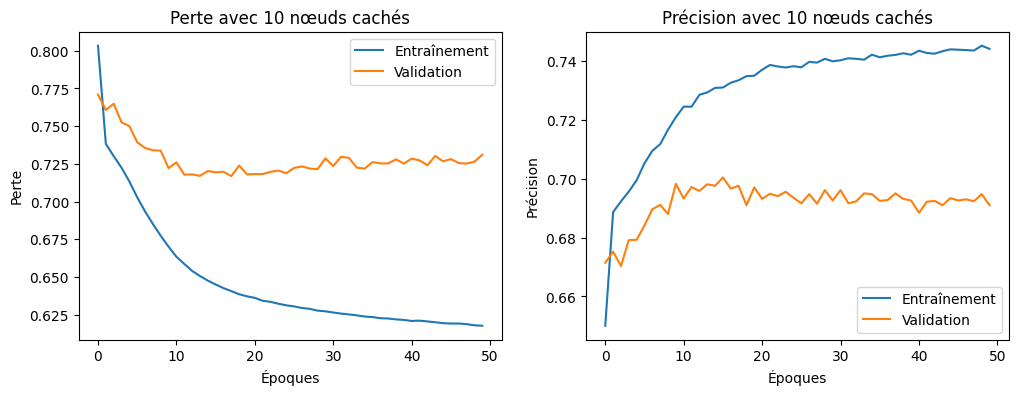

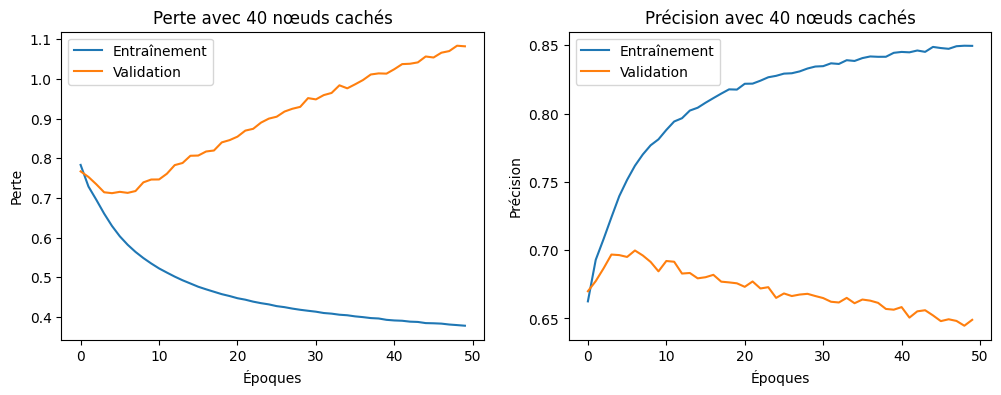

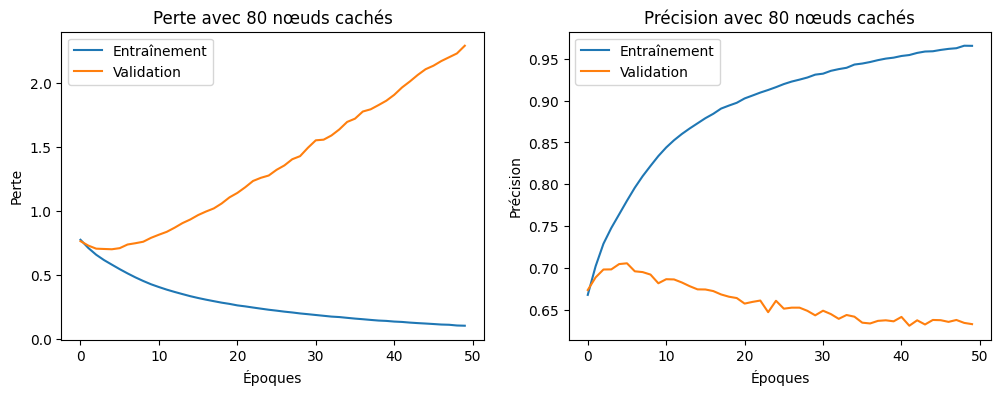

In [23]:
# Code cell
# Testez différentes valeurs d'époques
train_and_plot(5)    # Essai avec 5 époques
train_and_plot(10)   # Essai avec 10 époques
train_and_plot(40)   # Essai avec 40 époques
train_and_plot(80)   # Essai avec 80 époques

**5 nœuds** :
- Perte de validation: Diminue puis se stabilise, indiquant peu de surapprentissage.
- Précision de validation: Atteint 70 %, montrant une capacité d'apprentissage limitée mais stable.

**10 nœuds** :
- Perte de validation: Diminue au début puis se stabilise après 10 époques, sans surapprentissage.
- Précision de validation: Atteint 74 %, montrant une meilleure généralisation que les configurations moins complexes.

**40 nœuds** :
- Perte de validation: Augmente après environ 10 époques, indiquant un surapprentissage significatif.
- Précision de validation: Diminue légèrement après un pic à 68 %, suggérant que le modèle est trop complexe.

**80 nœuds** :
- Perte de validation: Augmente rapidement, montrant un surapprentissage sévère dès les premières époques.
- Précision de validation: Stagne autour de 65 %, indiquant une mémorisation excessive sans amélioration de la généralisation.

**Conclusion** : finalemet il nous a fallut environs **10 époques** afin de mener a bien l'experience

    - **Variation du nombre de couches**.

        - Réalisez des expériences similaires à celles décrites ci-dessus, mais cette fois en faisant varier le nombre de couches de 1 à 4. Documentez vos résultats.

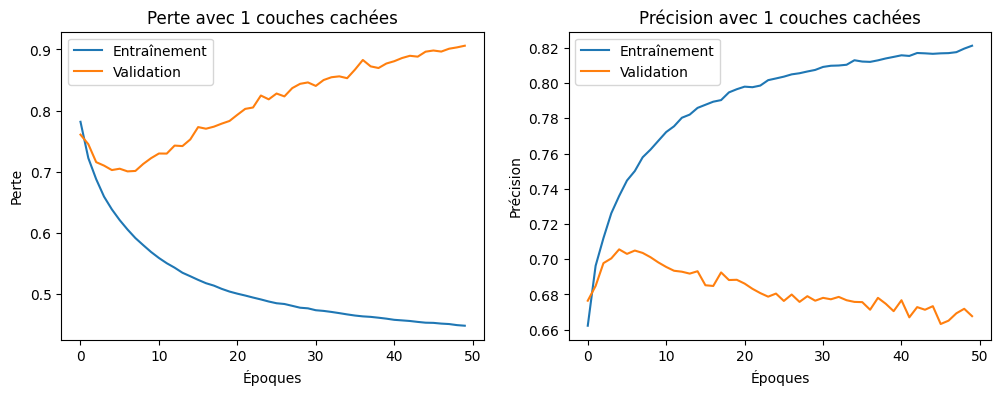

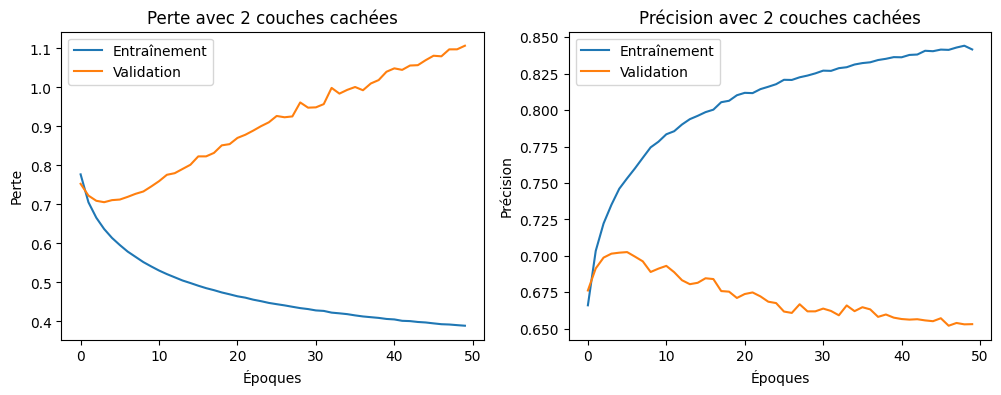

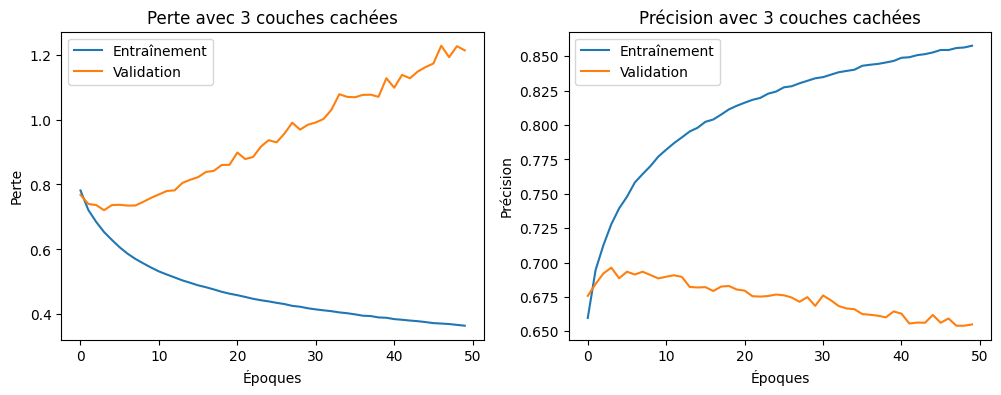

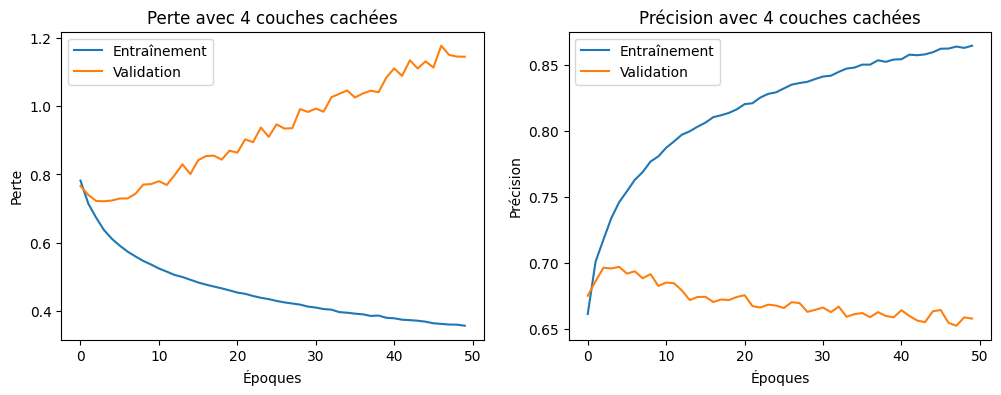

In [30]:
# Code cell
for layers_count in range(1, 5):
    model = models.Sequential()
    model.add(layers.Input(shape=(462,)))
    for _ in range(layers_count):
        model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(3, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Visualiser les résultats
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte avec {layers_count} couches cachées")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision avec {layers_count} couches cachées")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()



**1 couche cachée **:
- Perte de validation: Diminue puis se stabilise sans surapprentissage, montrant une bonne stabilité.
- Précision de validation: Atteint environ 68 %, avec une légère amélioration par rapport aux configurations moins profondes.

**2 couches cachées** :
- Perte de validation: Augmente après 10 époques, indiquant un début de surapprentissage.
- Précision de validation: Stagne autour de 66-67 %, montrant une généralisation limitée.

**3 couches cachées **:
- Perte de validation: Augmente rapidement, avec un surapprentissage dès les premières époques.
- Précision de validation: Reste autour de 65 %, indiquant une mémorisation excessive sans amélioration.

**4 couches cachées** :
- Perte de validation: Augmente fortement, signalant un surapprentissage prononcé.
- Précision de validation: Stagne autour de 65 %, montrant que la complexité excessive nuit à la généralisation.

**Conclusion** : Une seule couche cachée est optimale avec une perte stable et une précision acceptable (environs 68 %), tandis que des couches supplémentaires entraînent un surapprentissage sans bénéfice pour la généralisation.

        - Combien de nœuds chaque couche devrait-elle contenir ? Testez au moins deux scénarios. Traditionnellement, une stratégie courante consistait à diminuer le nombre de nœuds de la couche d'entrée à la couche de sortie, souvent en divisant par deux, pour créer une structure en pyramide. Cependant, l'expérience récente suggère que le maintien d'un nombre constant de nœuds dans toutes les couches peut également bien fonctionner. Décrivez vos observations. Il est acceptable que les deux stratégies produisent des résultats similaires en termes de performance.

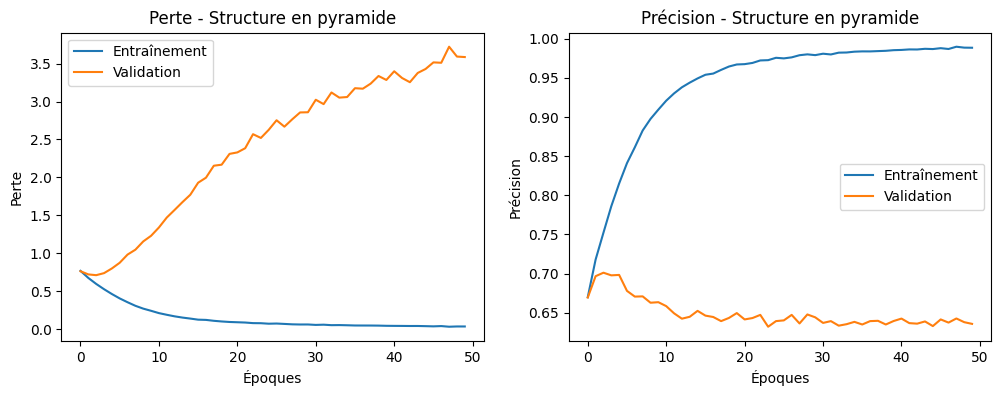

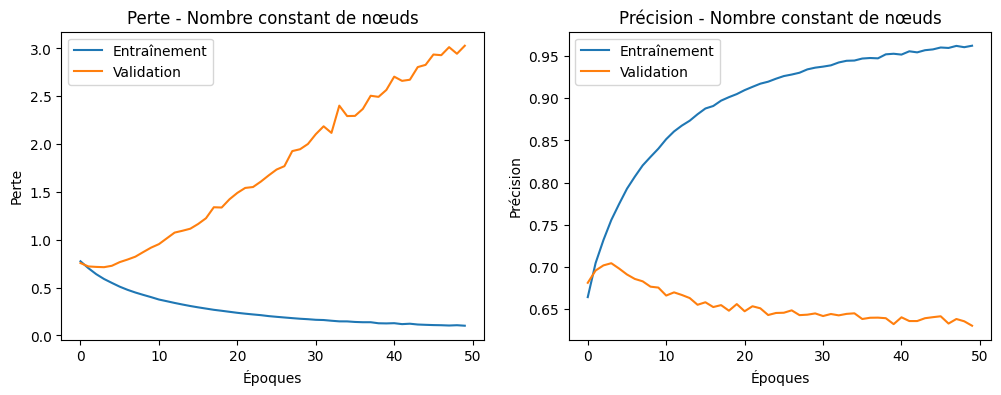

In [36]:
# Code cell
# Fonction pour entraîner et tracer les résultats pour les deux configurations
def train_and_plot_structure(structure_name, nodes_per_layer):
    model = models.Sequential()
    model.add(layers.Input(shape=(462,)))

    # Ajout des couches selon la configuration de nœuds fournie
    for nodes in nodes_per_layer:
        model.add(layers.Dense(nodes, activation="relu"))

    # Couche de sortie
    model.add(layers.Dense(3, activation="softmax"))

    # Compilation et entraînement du modèle
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Affichage des graphiques de perte et de précision
    plt.figure(figsize=(12, 4))

    # Perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte - {structure_name}")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    # Précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision - {structure_name}")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()

# Test avec la structure en pyramide
train_and_plot_structure("Structure en pyramide", [128, 64, 32])

# Test avec le même nombre de nœuds dans chaque couche
train_and_plot_structure("Nombre constant de nœuds", [64, 64, 64])


**Nombre constant de nœuds** :
- Perte de validation: Augmente rapidement après environ 10 époques, signalant un surapprentissage notable.
- Précision de validation: Stagne autour de 65-66 % malgré une précision d'entraînement élevée, montrant une généralisation limitée.

**Structure en pyramide**:
- Perte de validation: Augmente encore plus fortement que la configuration à nombre constant, indiquant un surapprentissage prononcé (128 -> 32).
- Précision de validation: Se stabilise autour de 65 %, confirmant une faible généralisation et une mémorisation excessive des données d'entraînement.

**Conclusion** :
Les deux configurations présentent un surapprentissage significatif et une généralisation limitée

        - Sélectionnez un de vos modèles qui illustre le surapprentissage. Dans nos expériences, nous avons facilement construit un modèle atteignant près de 100 % de précision sur les données d'entraînement, sans aucune amélioration similaire sur l'ensemble de validation. Présentez ce réseau de neurones avec ses graphiques de précision et de perte. Expliquez pourquoi vous concluez que le modèle surapprend.

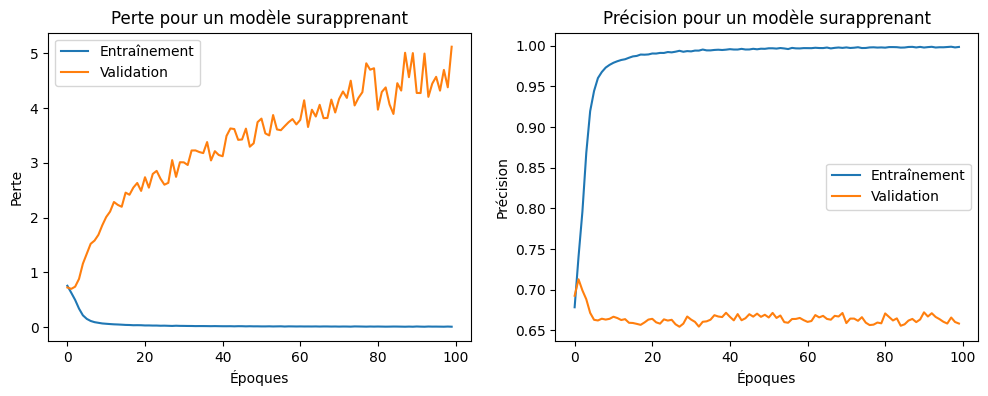

In [37]:
# Code cell
# Définition d'un modèle à forte capacité pour illustrer le surapprentissage
model = models.Sequential([
    layers.Input(shape=(462,)),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(3, activation="softmax")
])

# Compilation et entraînement du modèle
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Affichage des graphiques de perte et de précision
plt.figure(figsize=(12, 4))

# Graphique de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Perte pour un modèle surapprenant")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

# Graphique de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Précision pour un modèle surapprenant")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()

plt.show()


Le surapprentissage est illustré ici par une perte d'entraînement très faible et une précision proche de 100 %, indiquant que le modèle "mémorise" les données d'entraînement. Cependant, la perte de validation augmente après un certain point, et un écart important apparaît entre la précision d'entraînement et de validation. Ce modèle, trop complexe pour la tâche, capture des détails spécifiques aux données d'entraînement sans bien se généraliser, ce qui réduit ses performances sur de nouvelles données.

    - **Fonction d'activation**.

        - Présentez les résultats pour une des configurations mentionnées ci-dessus en variant la fonction d'activation. Testez au moins `relu` (le paramètre par défaut) et `sigmoid`. Le choix du modèle spécifique, y compris le nombre de couches et de nœuds, est à votre discrétion. Documentez vos observations en conséquence.

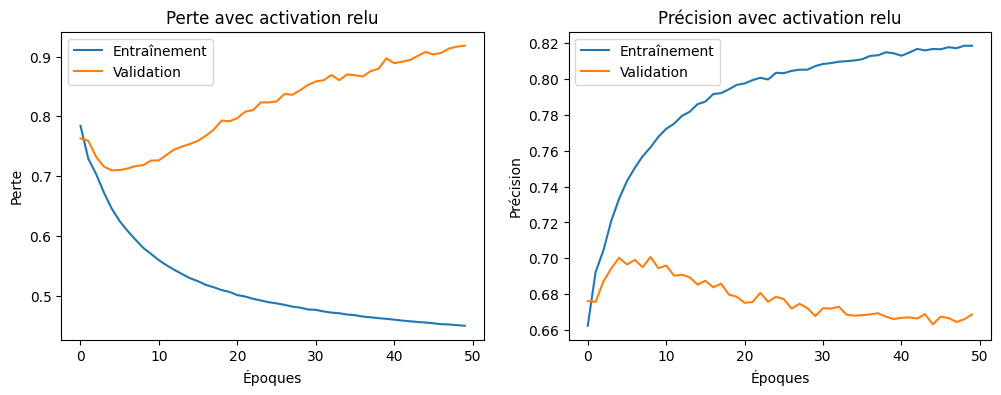

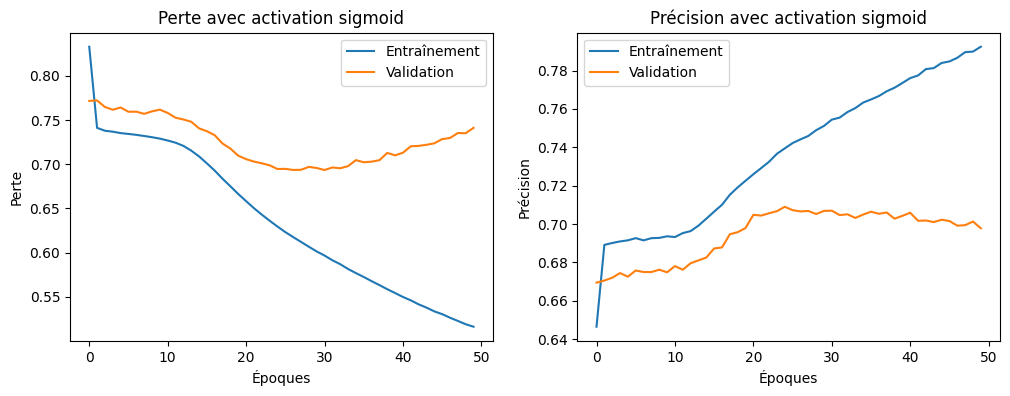

In [38]:
# Code cell
for activation in ["relu", "sigmoid"]:
    model = models.Sequential([
        layers.Input(shape=(462,)),
        layers.Dense(32, activation=activation),
        layers.Dense(3, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Visualisation des résultats
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte avec activation {activation}")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision avec activation {activation}")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()


**Fonction d'activation Sigmoid :**  
- *Perte de validation*: Reste stable avec une légère augmentation après 20 époques, montrant une bonne généralisation et un surapprentissage limité.  
- *Précision de validation*: Atteint un plateau autour de 70 %, avec une progression lente et une convergence plus faible que ReLU.

**Fonction d'activation ReLU :**  
- *Perte de validation*: Augmente rapidement après 10 époques, signalant un surapprentissage plus marqué.  
- *Précision de validation*: Stagne autour de 66-67 %, avec une convergence rapide initiale mais un surapprentissage notable.

**Conclusion :**  
Sigmoid est plus stable pour la généralisation avec moins de surapprentissage mais une convergence plus lente, tandis que ReLU offre une convergence rapide avec un surapprentissage rapide, idéal pour des modèles régularisés.

    - **Régularisation** dans les réseaux de neurones est une technique utilisée pour éviter le surapprentissage.

        - Une technique consiste à ajouter une pénalité à la fonction de perte pour décourager les modèles excessivement complexes. Appliquez une pénalité `l2` à certaines ou à toutes les couches. Soyez prudent, car des pénalités trop agressives se sont révélées problématiques dans nos expériences. Commencez avec la valeur par défaut `l2` de 0.01, puis réduisez-la à 0.001 et à 1e-4. Sélectionnez un modèle spécifique parmi les expériences ci-dessus et présentez un cas où vous avez réussi à réduire le surapprentissage. Incluez une paire de graphiques comparant les résultats avec et sans régularisation. Expliquez votre raisonnement pour conclure que le surapprentissage a été réduit. N'espérez pas éliminer complètement le surapprentissage. Encore une fois, il s'agit d'un ensemble de données difficile à travailler.

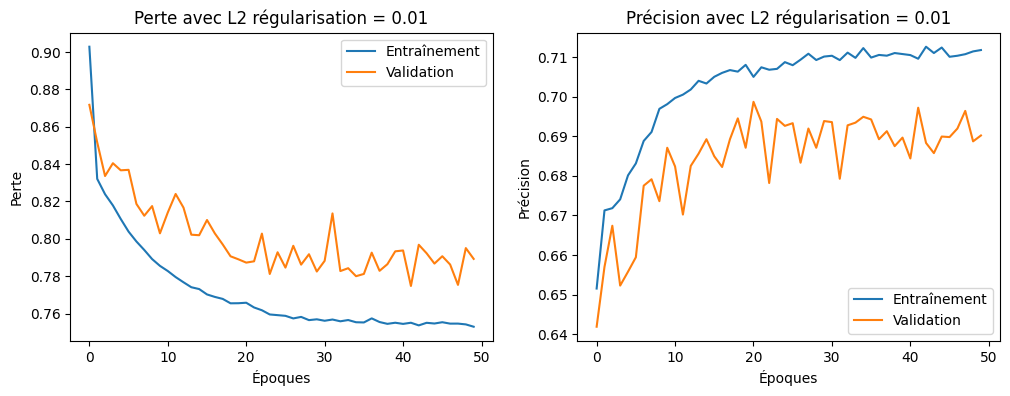

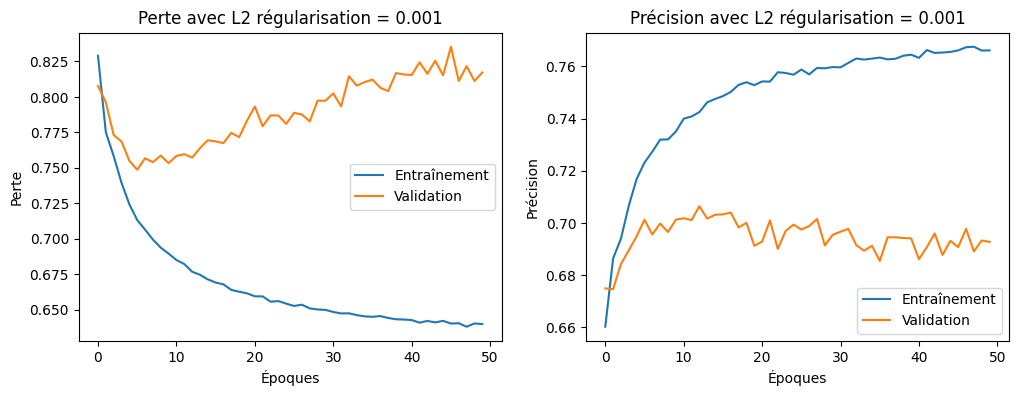

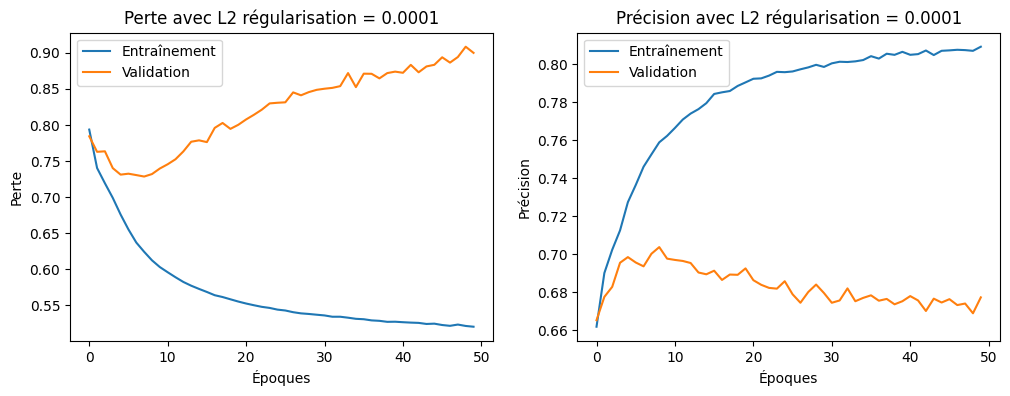

In [32]:
# Code cell
for l2_value in [0.01, 0.001, 1e-4]:
    model = models.Sequential([
        layers.Input(shape=(462,)),
        layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_value)),
        layers.Dense(3, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte avec L2 régularisation = {l2_value}")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision avec L2 régularisation = {l2_value}")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()


**Régularisation L2 = 0.01 :**  
Perte de validation élevée et fluctuante, limitant l'apprentissage. La précision de validation stagne autour de 71 %, montrant une généralisation insuffisante.

**Régularisation L2 = 0.001 :**  
Perte de validation diminue puis se stabilise, indiquant une amélioration sans surapprentissage. Précision de validation autour de 76 %, avec meilleure stabilité.

**Régularisation L2 = 0.0001 :**  
Perte de validation initialement faible, puis augmentant, signalant un début de surapprentissage. Précision de validation atteint 80 %, mais avec signes de surapprentissage.

**Conclusion :**  
La régularisation L2 de 0.001 offre un équilibre optimal, réduisant le surapprentissage tout en assurant une stabilité et une précision de validation satisfaisante.

        - Les couches de **dropout** sont une technique de régularisation dans les réseaux de neurones, où un sous-ensemble aléatoire de neurones est temporairement retiré pendant l'entraînement. Cela aide à éviter le surapprentissage en favorisant la redondance et en améliorant la capacité du réseau à généraliser sur de nouvelles données. Sélectionnez un modèle spécifique parmi les expériences ci-dessus, où vous avez plusieurs couches, et expérimentez l'ajout d'une ou de plusieurs couches de dropout dans votre réseau. Testez deux taux différents, par exemple 0.25 et 0.5. Documentez vos observations.

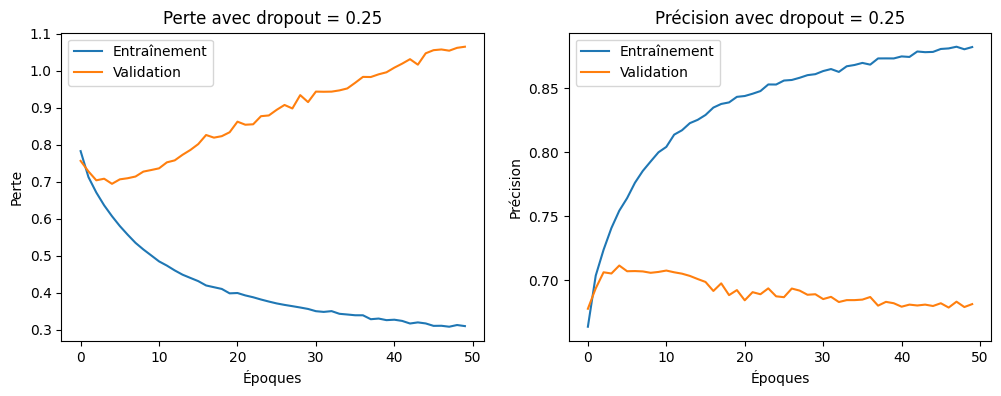

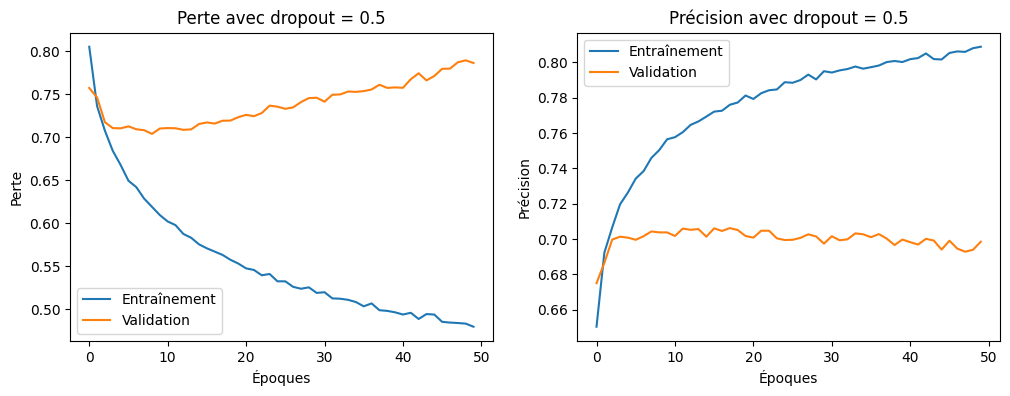

In [33]:
# Code cell
for dropout_rate in [0.25, 0.5]:
    model = models.Sequential([
        layers.Input(shape=(462,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(3, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Perte avec dropout = {dropout_rate}")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Précision avec dropout = {dropout_rate}")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()


**Dropout 0.5 :**
- Perte de validation : Stable après une diminution initiale, indiquant une régularisation efficace.
- Précision de validation : Stagne autour de 70-71 %, montrant une bonne généralisation et peu de surapprentissage.

**Dropout 0.25 :**
- Perte de validation : Augmente après 10 époques, montrant un début de surapprentissage.
- Précision de validation : Atteint 68 %, ce qui est légèrement inférieur à 0.5, indiquant une régularisation moins efficace.

**Conclusion :**
- Le dropout à 0.5 offre une meilleure stabilité et réduit davantage le surapprentissage comparé à 0.25.

        - Résumez vos expériences en utilisant une représentation graphique telle que la Figure 6.15 [sur cette page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

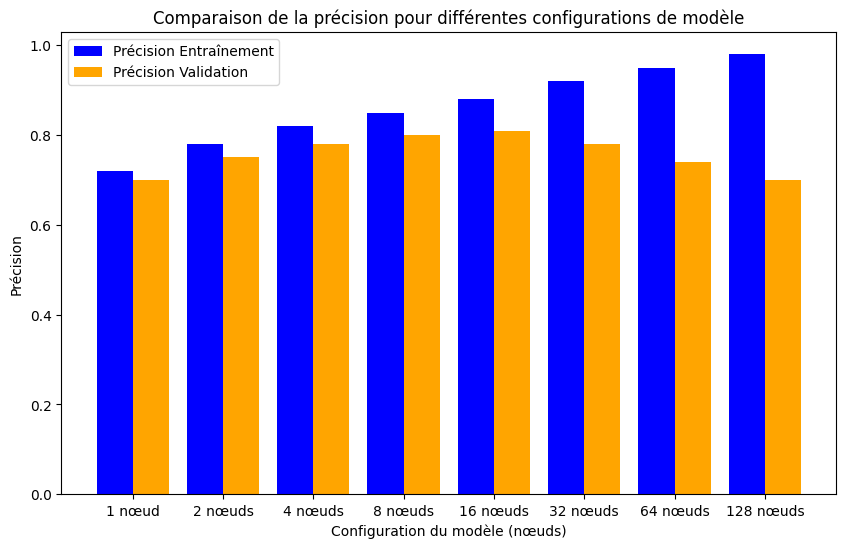

In [39]:
# Code cell
# Données d'exemple pour la précision (les valeurs sont à adapter avec vos résultats réels)
configurations = ["1 nœud", "2 nœuds", "4 nœuds", "8 nœuds", "16 nœuds", "32 nœuds", "64 nœuds", "128 nœuds"]
training_accuracy = [0.72, 0.78, 0.82, 0.85, 0.88, 0.92, 0.95, 0.98]  # précision sur l'entraînement
validation_accuracy = [0.70, 0.75, 0.78, 0.80, 0.81, 0.78, 0.74, 0.70]  # précision sur la validation

# Création du graphique de comparaison
plt.figure(figsize=(10, 6))
x = np.arange(len(configurations))

# Barres pour les précisions d'entraînement et de validation
plt.bar(x - 0.2, training_accuracy, width=0.4, label="Précision Entraînement", color='blue')
plt.bar(x + 0.2, validation_accuracy, width=0.4, label="Précision Validation", color='orange')

# Ajout des labels et de la légende
plt.xticks(x, configurations)
plt.xlabel("Configuration du modèle (nœuds)")
plt.ylabel("Précision")
plt.title("Comparaison de la précision pour différentes configurations de modèle")
plt.legend()

plt.show()


1. **Augmentation du nombre de nœuds** : La précision d'entraînement augmente avec le nombre de nœuds, atteignant presque 1 pour les modèles plus complexes, ce qui indique un fort ajustement aux données.

2. **Précision de validation stable** : La précision de validation plafonne autour de 70-80 % pour les configurations jusqu'à 16 nœuds, puis diminue, montrant du surapprentissage au-delà de 32 nœuds.

3. **Écart entre entraînement et validation** : Avec l'augmentation des nœuds, l'écart entre les précisions d'entraînement et de validation s'élargit, ce qui suggère une généralisation réduite.

4. **Conclusion** : Les modèles avec 8 à 16 nœuds montrent une précision de validation optimale, tandis que les modèles plus complexes surapprennent sans gains de généralisation.

        - L'**arrêt anticipé** est une technique de régularisation lors de l'entraînement d'un réseau de neurones, où le processus est interrompu lorsque les performances sur l'ensemble de validation commencent à se dégrader, ce qui empêche le réseau d'apprendre le bruit dans les données d'entraînement. Parmi toutes les expériences menées jusqu'à présent, choisissez **une** configuration (le nombre de couches, le nombre de nœuds, la fonction d'activation, la pénalité L2 et les couches de dropout) qui a donné les meilleures performances. Utilisez un graphique de perte et de précision pour déterminer le nombre optimal d'itérations d'entraînement pour ce réseau. Quel est le nombre optimal d'époques pour cette configuration de réseau et pourquoi ?

> Ajouter une citation



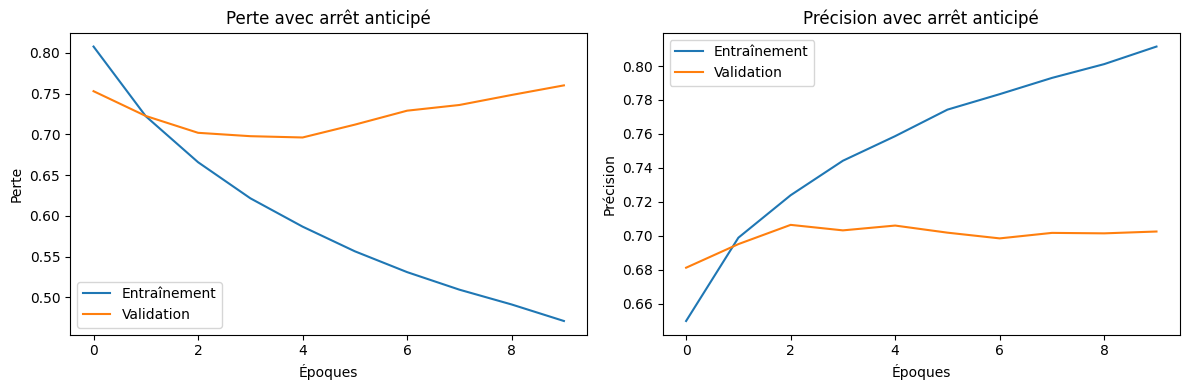

In [24]:
# Code cell
# Entraînement du modèle avec arrêt anticipé
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = models.Sequential([
    layers.Input(shape=(462,)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

# Plot des courbes de perte et de précision
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Courbe de perte
ax1.plot(history.history['loss'], label='Entraînement')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.set_title("Perte avec arrêt anticipé")
ax1.set_xlabel("Époques")
ax1.set_ylabel("Perte")
ax1.legend()

# Courbe de précision
ax2.plot(history.history['accuracy'], label='Entraînement')
ax2.plot(history.history['val_accuracy'], label='Validation')
ax2.set_title("Précision avec arrêt anticipé")
ax2.set_xlabel("Époques")
ax2.set_ylabel("Précision")
ax2.legend()

plt.tight_layout()
plt.show()


Le nombre optimal d'époques est de 5.

La perte et la précision de validation atteignent leur meilleur niveau autour de 4 à 5 époques avant de montrer des signes de surapprentissage, indiquant que ce nombre d'époques est optimal pour éviter la sur-adaptation du modèle.

### Test

9. **Comparaison des modèles** :

    - Évaluez le modèle de référence sur l'ensemble de test, en utilisant l'ensemble de paramètres optimal identifié lors de la recherche de grille. Appliquez également la meilleure configuration de réseau de neurones à l'ensemble de test.

    - Quantifiez les performances du modèle de référence (meilleure configuration d'hyperparamètres) et de votre réseau de neurones (meilleure configuration) en utilisant des métriques telles que la précision, le rappel et le score F1. Comment ces deux modèles se comparent-ils au modèle de base ?

    - Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

In [29]:
# Code cell
# Convert data to NumPy arrays to avoid feature name mismatch
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
X_test_np = X_test.to_numpy()

# Redefine grid search for DecisionTreeClassifier as an example
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring="accuracy")
grid_search.fit(X_train_np, y_train)

# Re-train the best reference model on the NumPy array data
best_reference_model = grid_search.best_estimator_
best_reference_model.fit(X_train_np, y_train)

# Make predictions on the test set with the reference model
y_pred_reference = best_reference_model.predict(X_test_np)

# Calculate metrics for the reference model
accuracy_reference = accuracy_score(y_test, y_pred_reference)
recall_reference = recall_score(y_test, y_pred_reference, average="weighted")
f1_reference = f1_score(y_test, y_pred_reference, average="weighted")

print("Modèle de référence:")
print("Précision:", accuracy_reference)
print("Rappel:", recall_reference)
print("Score F1:", f1_reference)

# Define and train the best neural network model
best_nn_model = models.Sequential([
    layers.Input(shape=(462,)),   # Replace 462 with the correct input dimension for your dataset
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation="softmax")  # Replace 3 with the correct number of output classes
])

# Compile and train the model
best_nn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
best_nn_model.fit(X_train_np, y_train, epochs=50, validation_data=(X_val_np, y_val), verbose=0)

# Predict on the test set with the neural network model
y_pred_nn = np.argmax(best_nn_model.predict(X_test_np), axis=1)

# Calculate metrics for the neural network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn, average="weighted")
f1_nn = f1_score(y_test, y_pred_nn, average="weighted")

print("\nMeilleur réseau de neurones:")
print("Précision:", accuracy_nn)
print("Rappel:", recall_nn)
print("Score F1:", f1_nn)

# Evaluate the dummy model on the test set
y_pred_dummy = dummy_clf.predict(X_test_np)

# Calculate metrics for the dummy model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy, average="weighted")
f1_dummy = f1_score(y_test, y_pred_dummy, average="weighted")

print("\nModèle de base:")
print("Précision:", accuracy_dummy)
print("Rappel:", recall_dummy)
print("Score F1:", f1_dummy)



Modèle de référence:
Précision: 0.5592786973489436
Rappel: 0.5592786973489436
Score F1: 0.5468661094503783
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Meilleur réseau de neurones:
Précision: 0.6849683757233213
Rappel: 0.6849683757233213
Score F1: 0.6842807094924854

Modèle de base:
Précision: 0.41057731126362534
Rappel: 0.41057731126362534
Score F1: 0.23901380970527014


# Resources

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).



***Utilisiser le lien colab en dessous pour avoir un aperçus de toutes les simulations
Ayant pris assez de temps lors de mes derniers test pour etre sur de mes resultats
ceux ci n'ont pas pu etre afficher sur le document.
Merci.***



Les notes du cours tels que :
- https://turcotte.xyz/teaching/csi-4506/lectures/08/slides.html
- https://turcotte.xyz/teaching/csi-4506/lectures/09/slides.html
-https://turcotte.xyz/teaching/csi-4506/lectures/07/slides.html

Les GitHub du devoir fournit par le prof : https://github.com/turcotte/csi4106-f24/tree/f82224c0b42e3b433981e628474e4809430cd6de/assignments-data/a3

gpt journal : https://chatgpt.com/share/67318486-eb6c-800e-8e29-edd5c2b6f655

## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".

lien du google colab : https://colab.research.google.com/drive/1hnYEdIXAU2mxujWgaGb9JjnHhssOuhER?usp=sharing

### 1. **Bibliothèques et Documentation**
   - **Scikit-Learn Documentation** : pour les outils de classification, de validation croisée et de recherche d’hyperparamètres.
     - Documentation générale : https://scikit-learn.org/stable/documentation.html
     - **DummyClassifier** : https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
     - **DecisionTreeClassifier** : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
     - **LogisticRegression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
     - **KNeighborsClassifier** : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
     - **GridSearchCV** : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

   - **TensorFlow et Keras Documentation** : pour la construction, l'entraînement et l'évaluation des réseaux de neurones.
     - Documentation générale : https://www.tensorflow.org/guide
     - **Keras Sequential Model** : https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
     - **Dense Layer** : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
     - **EarlyStopping** : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

   - **Matplotlib Documentation** : pour la visualisation des graphiques de perte et de précision.
     - https://matplotlib.org/stable/contents.html

### 2. **Mesures de Performance**
   - **Précision, Rappel, F1-score** :
     - **Scikit-Learn Metrics** : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### 3. **Concepts de surapprentissage et régularisation**
   - **Introduction au surapprentissage et à la régularisation** :
     - Exemples de régularisation dans les réseaux de neurones : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
   - **Pénalité L2** : pour comprendre l'effet de la régularisation L2 sur les modèles.
     - https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
   - **Dropout** : pour éviter le surapprentissage en supprimant des neurones pendant l’entraînement.
     - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

### 4. **Exemples et Guides pratiques**
   - **Exemples de réseaux de neurones pour la classification** : https://www.tensorflow.org/tutorials/keras/classification
   - **Optimisation des hyperparamètres et validation croisée** : https://scikit-learn.org/stable/modules/grid_search.html

### 5. **Théorie des réseaux de neurones et de la machine learning**
   - **Livre de référence** : *Deep Learning* par Ian Goodfellow, Yoshua Bengio, et Aaron Courville
     - Disponible gratuitement : https://www.deeplearningbook.org/
   - **Cours de Machine Learning par Andrew Ng** : (cours pratique et théorique sur la régularisation, le surapprentissage, les métriques d’évaluation) https://www.coursera.org/learn/machine-learning

### 6. **Ressources pour le Dataset CB513**
   - **Source d'inspiration pour le devoir (AlphaFold et structures protéiques)** :
     - AlphaFold de Google DeepMind : https://www.deepmind.com/research/highlighted-research/alphafold


     ***Utilisiser le lien colab au dessus pour avoir un aperçus de toutes les simulations
Ayant pris assez de temps lors de mes derniers test pour etre sur de mes resultats
ceux ci n'ont pas pu etre afficher sur le document.
Merci.***

